# S12 T01: Pipelines, grid search i text mining

**Objectius:**
 - Utilitzar pipelines i grid search
 - Realitzar mineria de texts

Recursos de l'aula i https://www.nltk.org

Otra biografia de Text mining:
 - https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
 - https://realpython.com/python-nltk-sentiment-analysis/

## Exercici 1
**Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.**


We will start building a prototype model

Biography: https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/

### Building a prototype model

**Data Exploration and Preprocessing**

What is the first thing you do when you are provided with a dataset? You would explore the data, go through the individual variables, and clean the data to make it ready for the model building process.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We select an airbnb dataset that contain Barcelona rooms and houses available for rent.

In [84]:
# Dataset from https://www.kaggle.com/fermatsavant/airbnb-dataset-of-barcelona-city?select=tomslee_airbnb_barcelona_1477_2017-07-23.csv
airbnb_df = pd.read_csv('tomslee_airbnb_barcelona_1477_2017-07-23.csv')

In [85]:
airbnb_df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,12331794,1477,41933599,Shared room,NaN,Barcelona,NaN,Eixample,0,0.0,5,1.0,NaN,211.0,NaN,5-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:29.434152,41.387023,2.167047,0101000020E6100000C828CFBC1C56014060E63BF889B1...
1,12331935,1477,41933599,Shared room,NaN,Barcelona,NaN,Eixample,0,0.0,6,1.0,NaN,253.0,NaN,6-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:29.431042,41.387658,2.167093,0101000020E6100000CD1FD3DA34560140320400C79EB1...
2,12332051,1477,41933599,Shared room,NaN,Barcelona,NaN,Eixample,0,0.0,8,1.0,NaN,289.0,NaN,8-bed mixed dorm at ACYHostel,2017-07-28 14:49:29.427665,41.387962,2.165981,0101000020E61000001B0FB6D8ED5301409E0B23BDA8B1...
3,4627938,1477,23968212,Shared room,NaN,Barcelona,NaN,Eixample,27,4.5,10,1.0,NaN,264.0,NaN,THE HIPSTEL hostel 1 BED IN DORM-10 Shared WC,2017-07-28 14:49:29.424265,41.391617,2.162516,0101000020E6100000289D4830D54C014060C77F8120B2...
4,12331497,1477,41933599,Shared room,NaN,Barcelona,NaN,Eixample,0,0.0,4,1.0,NaN,169.0,NaN,4-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:25.542467,41.386288,2.165477,0101000020E6100000EAEBF99AE55201402B6B9BE271B1...


In [86]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18838 entries, 0 to 18837
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18838 non-null  int64  
 1   survey_id             18838 non-null  int64  
 2   host_id               18838 non-null  int64  
 3   room_type             18838 non-null  object 
 4   country               0 non-null      float64
 5   city                  18838 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18838 non-null  object 
 8   reviews               18838 non-null  int64  
 9   overall_satisfaction  18838 non-null  float64
 10  accommodates          18838 non-null  int64  
 11  bedrooms              18838 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18838 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

In [87]:
airbnb_df.shape

(18838, 20)

In [88]:
airbnb_df.columns


Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [89]:
# Remove un-necessary columns that do not add any value or do not have any information
airbnb_df.drop(['room_id', 'survey_id', 'host_id', 'country', 'city',
       'borough', 'bathrooms', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'], axis=1, inplace=True)

In [90]:
airbnb_df.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,Shared room,Eixample,0,0.0,5,1.0,211.0
1,Shared room,Eixample,0,0.0,6,1.0,253.0
2,Shared room,Eixample,0,0.0,8,1.0,289.0
3,Shared room,Eixample,27,4.5,10,1.0,264.0
4,Shared room,Eixample,0,0.0,4,1.0,169.0


In [91]:
airbnb_df.room_type.value_counts()

Private room       9821
Entire home/apt    8877
Shared room         140
Name: room_type, dtype: int64

We assume that we are interested only on entire home/apartments, so we remove the rest of the rows

In [92]:
airbnb_df2 = airbnb_df[airbnb_df['room_type'] == 'Entire home/apt']

In [93]:
airbnb_df2.drop('room_type', axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [94]:
airbnb_df2.shape

(8877, 6)

In [95]:
airbnb_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 140 to 9357
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighborhood          8877 non-null   object 
 1   reviews               8877 non-null   int64  
 2   overall_satisfaction  8877 non-null   float64
 3   accommodates          8877 non-null   int64  
 4   bedrooms              8877 non-null   float64
 5   price                 8877 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 485.5+ KB


We investigate which is the correlation in between the variables.

In [96]:
airbnb_df2.corr()

,reviews,overall_satisfaction,accommodates,bedrooms,price
reviews,1.000000,0.456976,0.008084,-0.020335,-0.152785
overall_satisfaction,0.456976,1.000000,0.034264,0.023855,-0.150285
accommodates,0.008084,0.034264,1.000000,0.790484,0.410868
bedrooms,-0.020335,0.023855,0.790484,1.000000,0.405557
price,-0.152785,-0.150285,0.410868,0.405557,1.000000


The correlations of all variables is low. Variables 'accomodats' and 'bedrooms' have the best correlation with price, but they have a very strong correlation in between them. Normally better to remove one of the two variables, but before we do it we are going to check graphically the dispersion of the values and the correlation using both variables.

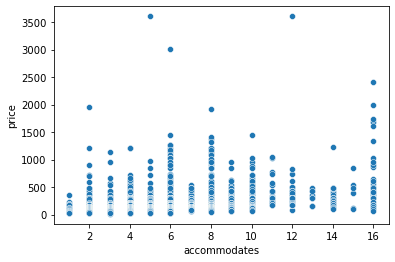

In [97]:
sns.scatterplot(data = airbnb_df2, x = "accommodates", y = "price");

The graph shows a wide dispersion which mean that it will be difficult to get a good model representation. We try to compare if the dispersion is similar in all neighborhoods or not.

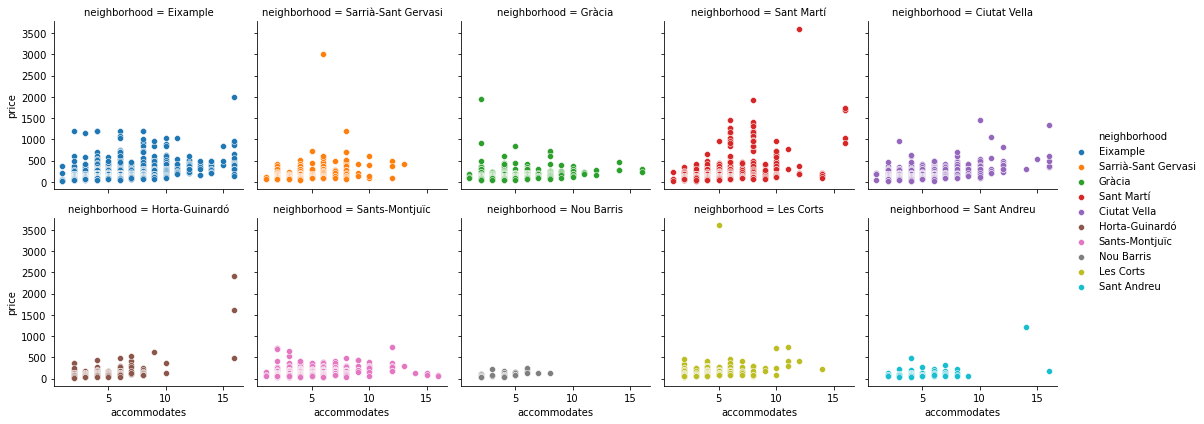

In [98]:
grid = sns.FacetGrid(airbnb_df2, col = "neighborhood", hue = "neighborhood", col_wrap=5)
grid.map(sns.scatterplot, "accommodates", "price")

grid.add_legend();

We noted that the wide dispersion is common in most of the neighbohoods. The trend seems to have an 
increase of price when the number of bedrooms increase.

In [99]:
airbnb_df2.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price
count,8877.000000,8877.000000,8877.000000,8877.000000,8877.000000
mean,27.592317,3.064042,4.813676,2.060944,171.857272
std,42.258221,2.137190,2.227684,1.149878,145.855784
min,0.000000,0.000000,1.000000,0.000000,11.000000
25%,1.000000,0.000000,4.000000,1.000000,102.000000
50%,9.000000,4.500000,4.000000,2.000000,137.000000
75%,37.000000,4.500000,6.000000,3.000000,192.000000
max,360.000000,5.000000,16.000000,10.000000,3606.000000


**Remove Categorical Variables**
Additionally, machine learning models cannot work with categorical (string) data as well, specifically scikit-learn. Before building a machine learning model, we need to convert the categorical variables into numeric types.

Therefore we need to convert the neighborhood to numbers.

In [100]:
airbnb_df3 = pd.get_dummies(airbnb_df2)

In [101]:
airbnb_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 140 to 9357
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reviews                           8877 non-null   int64  
 1   overall_satisfaction              8877 non-null   float64
 2   accommodates                      8877 non-null   int64  
 3   bedrooms                          8877 non-null   float64
 4   price                             8877 non-null   float64
 5   neighborhood_Ciutat Vella         8877 non-null   uint8  
 6   neighborhood_Eixample             8877 non-null   uint8  
 7   neighborhood_Gràcia               8877 non-null   uint8  
 8   neighborhood_Horta-Guinardó       8877 non-null   uint8  
 9   neighborhood_Les Corts            8877 non-null   uint8  
 10  neighborhood_Nou Barris           8877 non-null   uint8  
 11  neighborhood_Sant Andreu          8877 non-null   uint8  
 12  neig

**Scale the data**

Due to the nature of the data I decide to normalize the data and not standarize it.

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
mms = MinMaxScaler()

airbnb_df3[['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 
            'price']] = mms.fit_transform(airbnb_df3[['reviews', 'overall_satisfaction',
                                                      'accommodates', 'bedrooms', 'price']])

In [104]:
airbnb_df3.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,neighborhood_Ciutat Vella,neighborhood_Eixample,neighborhood_Gràcia,neighborhood_Horta-Guinardó,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants-Montjuïc,neighborhood_Sarrià-Sant Gervasi
140,0.000000,0.0,0.733333,0.4,0.134353,0,1,0,0,0,0,0,0,0,0
141,0.000000,0.0,0.733333,0.4,0.134353,0,1,0,0,0,0,0,0,0,0
142,0.002778,0.0,1.000000,0.8,0.176634,0,1,0,0,0,0,0,0,0,0
143,0.000000,0.0,1.000000,1.0,0.248401,0,1,0,0,0,0,0,0,0,0
144,0.002778,0.0,1.000000,0.6,0.096245,0,1,0,0,0,0,0,0,0,0


**Model Building**

As requested by the exercise we use the Random Forest model

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [106]:
#The target variable is price 
X = airbnb_df3.drop(['price'], axis=1).values
y = airbnb_df3.price.values

#Train-test-split to test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6657, 14) (2220, 14) (6657,) (2220,)


**Random Forest**

In [107]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

In [108]:
# Use the forest's predict method on the test data
y_pred_RF = rf.predict(X_test)

In [109]:
# R Square
rf_r2 = rf.score(X_test, y_test)
rf_r2

0.3939523274313176

As the results are low we try different models to select the best option.



In [110]:
# Mean Square Error(MSE)/Root Mean Square Error(RMSE)
MSE_RF = mean_squared_error(y_test, y_pred_RF)
RMSE_RF = math.sqrt(mean_squared_error(y_test, y_pred_RF))
print('Mean Squared Error =', MSE_RF)
print('Root Mean Squared Error =', RMSE_RF)

Mean Squared Error = 0.0007179433139992643
Root Mean Squared Error = 0.026794464241691122


**Neural Networks**

In [111]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500, random_state=42)

mlp.fit(X_train, y_train)

y_pred_NN = mlp.predict(X_test)

In [112]:
# R Square
mlp_r2 = mlp.score(X_test, y_test)
mlp_r2

0.06032610452676579

**Multiple Linear Regression**

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr = LinearRegression().fit(X_train, y_train)

In [115]:
# R Square
r_sq = lr.score(X_train, y_train)
r_sq

0.2235367095274432

The correlations of any of the models are very good, being the random forest the best model.

Trying to improve the R2 of the models by doing one or more of the below:
 - Remove 'accommodates' variable as it has a bid correlation with 'bedrooms'
 - Remove 'bedrooms' variable as it has a bid correlation with 'accommodates'
 - modify the outliners to increase de correlation. 
 - create a new variable price/accomodates to use as target and remove both price and accomodates
 
**Conclusion:** Any of the above actions have increased the R2, therefore to complete the exercise we are going to build the pipeline and try to select the best parameter using gridsearch on the random forest model.

In [116]:
#airbnb_df2 = airbnb_df2.drop(['bedrooms'], axis=1)
#airbnb_df2 = airbnb_df2.drop(['accommodates'], axis=1)

In [117]:
#Q:low = airbnb_df2.price.quantile(.05)
#Q_high = airbnb_df2.price.quantile(.99)

In [118]:
#airbnb_df2.loc [airbnb_df2["price"] < Q:low, "price"] = Q_low
#airbnb_df3.loc [airbnb_df2["price"] > Q_high, "price"] = Q_high
#airbnb_df3.describe()

**Building Pipeline**

Now that we have checked which are the requirements to get the best results with a model we are going to build a pipeline.

Despite that it´s not required we will import some libraries and the dataframe to keep all the pipeline information together

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [120]:
#import the dataset
airbnb_pipeline = pd.read_csv('tomslee_airbnb_barcelona_1477_2017-07-23.csv')

In [121]:

airbnb_pipeline = airbnb_pipeline[airbnb_df['room_type'] == 'Entire home/apt']


In [122]:
# NO HE CONSEGUIDO QUE ME FUNCIONE DE MODO QUE LO SACO DEL PIPELINE

# define the class OutletTypeEncoder
# This will be our custom transformer that will only keep 'Entire home/apt' for the room type
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X[X['room_type'] == 'Entire home/apt']
        return X

In [123]:
# pre-processsing step
# Drop the columns 
# Scale the data 

pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['room_id', 
                                                                        'survey_id', 
                                                                        'host_id', 
                                                                        'country', 
                                                                        'city',
                                                                        'borough', 
                                                                        'bathrooms', 
                                                                        'minstay', 
                                                                        'name',
                                                                       'last_modified', 
                                                                        'latitude', 
                                                                        'longitude', 
                                                                        'location',
                                                                        'room_type'
                                                                       ]),
                                               ('cat_variables', OneHotEncoder(), ['neighborhood']),
                                               ('scale_data', MinMaxScaler(),['reviews',
                                                                              'overall_satisfaction',
                                                                              'accommodates', 
                                                                              'bedrooms'
                                                                             ])
                                             ])

In [124]:
# Define the Pipeline
"""
Step1: get some rows removed
Step2: pre processing
Step3: Train a Random Forest Model
"""
#model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
#                                 ('remove_unwanted_rows', OutletTypeEncoder()),
#                                 ('random_forest', RandomForestRegressor(n_estimators = 100, random_state = 42))
#                                 ])

model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('RF', RandomForestRegressor(n_estimators = 100, random_state = 42))
                                 ])



In [125]:
#The target variable is price 
X = airbnb_pipeline.drop(['price'], axis=1)
y = airbnb_pipeline.price.values

#Train-test-split to test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the pipeline with the training data
model_pipeline.fit(X_train,y_train)

# predict target values on the training data
model_pipeline.predict(X_test)

# R Square
rf_r2 = model_pipeline.score(X_test, y_test)
print ('R2 = ', rf_r2)

(6657, 19) (2220, 19) (6657,) (2220,)
R2 =  0.38899516309592075


Now let´s optimize the model hyperparameters


In [126]:
from sklearn.model_selection import GridSearchCV


In [127]:
parameteres = {'RF__n_estimators':[50,100,150,200,300,500], 'RF__max_depth':[None,1,2], 'RF__max_features':['auto','sqrt','log2'] }
grid = GridSearchCV(model_pipeline, param_grid=parameteres, cv=10, scoring='r2')
grid.fit(X_train, y_train)
print ('score = %3.2f' %(grid.score(X_test,y_test)))
print (grid.best_params_)

score = 0.40
{'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__n_estimators': 500}


In [128]:
grid.score(X_test, y_test)

0.40461960942106656

In [129]:
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('RF', RandomForestRegressor(n_estimators = 500, max_depth= None, max_features= 'sqrt', random_state = 42))
                                 ])

In [130]:
#The target variable is price 
X = airbnb_pipeline.drop(['price'], axis=1)
y = airbnb_pipeline.price.values

#Train-test-split to test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit the pipeline with the training data
model_pipeline.fit(X_train,y_train)

# predict target values on the training data
model_pipeline.predict(X_test)

# R Square
rf_r2 = model_pipeline.score(X_test, y_test)
print ('R2 = ', rf_r2)

(6657, 19) (2220, 19) (6657,) (2220,)
R2 =  0.40461960942106656


The R2 has increased slightly

## Exercici 2
**Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules**

In [131]:
#!pip install nltk

In [132]:
import nltk
#nltk.download()
import string

In [133]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [134]:
def freq_words (text):
    tokenized_words = word_tokenize(text)
    #To remove punctuations. i.e. '.' ',' etc
    tokenized_words = list(filter(lambda token: token not in string.punctuation, tokenized_words))
    print('The words in the text are:\n', tokenized_words)
   
    fdist = FreqDist(tokenized_words)
    print(fdist)
    print ('The 5 most frequent words are:\n', fdist.most_common(5))
    
    #plot
    fdist.plot(10,cumulative=False, title = ('10 most frequent words'))
    plt.show()

    return tokenized_words

The words in the text are:
 ['What', 'is', 'hope', 'but', 'a', 'feeling', 'of', 'optimism', 'a', 'thought', 'that', 'says', 'things', 'will', 'improve', 'it', 'wo', "n't", 'always', 'be', 'bleak', 'there', "'s", 'a', 'way', 'to', 'rise', 'above', 'the', 'present', 'circumstances', 'Hope', 'is', 'an', 'internal', 'awareness', 'that', 'you', 'do', 'not', 'have', 'to', 'suffer', 'forever', 'and', 'that', 'somehow', 'somewhere', 'there', 'is', 'a', 'remedy', 'for', 'despair', 'that', 'you', 'will', 'come', 'upon', 'if', 'you', 'can', 'only', 'maintain', 'this', 'expectancy', 'in', 'your', 'heart']
<FreqDist with 56 samples and 69 outcomes>
The 5 most frequent words are:
 [('a', 4), ('that', 4), ('is', 3), ('you', 3), ('will', 2)]


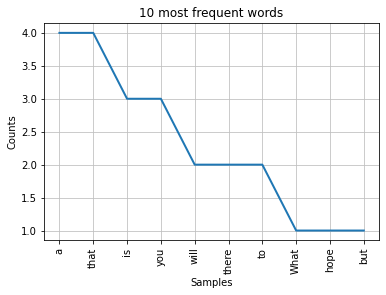

In [135]:
text="""What is hope but a feeling of optimism, a thought that says things will improve, it won't always be bleak, there's a way to rise above the present circumstances. Hope is an internal awareness that you do not have to suffer forever, and that somehow, somewhere there is a remedy for despair that you will come upon if you can only maintain this expectancy in your heart."""

#Text analysis after removing punctuation commas, dots, etc. (Not the negative contractions.)
tokenized_words = freq_words (text)

## Nivell 2 - Exercici 1
**Treu les stopwords i realitza stemming al teu conjunt de dades.**

**Stopwords** considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

We first apply the **stopwords** to the text and compare it with the word tokenize text

In [136]:
from nltk.corpus import stopwords

In [137]:
def compare_stopwords_sentencetokenized (text, tokenized_words):
    stop_words = set(stopwords.words("english"))

    filtered_words = []
    for w in tokenized_words:
        if w not in stop_words:
            filtered_words.append(w)
            
    print("Tokenized words:\n",tokenized_words)
    print("Filtered words:\n",filtered_words)
    
    return filtered_words, stop_words

In [138]:
filtered_words, stop_words = compare_stopwords_sentencetokenized (text, tokenized_words)

Tokenized words:
 ['What', 'is', 'hope', 'but', 'a', 'feeling', 'of', 'optimism', 'a', 'thought', 'that', 'says', 'things', 'will', 'improve', 'it', 'wo', "n't", 'always', 'be', 'bleak', 'there', "'s", 'a', 'way', 'to', 'rise', 'above', 'the', 'present', 'circumstances', 'Hope', 'is', 'an', 'internal', 'awareness', 'that', 'you', 'do', 'not', 'have', 'to', 'suffer', 'forever', 'and', 'that', 'somehow', 'somewhere', 'there', 'is', 'a', 'remedy', 'for', 'despair', 'that', 'you', 'will', 'come', 'upon', 'if', 'you', 'can', 'only', 'maintain', 'this', 'expectancy', 'in', 'your', 'heart']
Filtered words:
 ['What', 'hope', 'feeling', 'optimism', 'thought', 'says', 'things', 'improve', 'wo', "n't", 'always', 'bleak', "'s", 'way', 'rise', 'present', 'circumstances', 'Hope', 'internal', 'awareness', 'suffer', 'forever', 'somehow', 'somewhere', 'remedy', 'despair', 'come', 'upon', 'maintain', 'expectancy', 'heart']


In [139]:
#The stopwords are the follwoing
print(stop_words)

{'once', 'herself', 'having', 'during', 'over', 'shouldn', "weren't", 'between', 'most', "mightn't", 'we', "you've", 'himself', 'yourself', 'are', 'itself', 'where', 'can', 'what', 'is', 'won', "shan't", 'more', 'needn', 'that', 'further', 'both', 'to', "couldn't", 'mustn', 'up', "you'd", "won't", 'been', 'd', "hadn't", "wasn't", 'wouldn', 'these', 'as', "aren't", "it's", 'didn', 'isn', 'yourselves', 'very', "you're", 'his', 'her', 'its', 'through', 'will', 'me', "shouldn't", 'until', 'now', 'being', 'y', 'they', 'them', 'not', 'an', "mustn't", 'all', 'aren', 's', 'about', 'don', "you'll", 'who', 'for', "that'll", 'here', 'too', 'll', 'again', 'why', 'am', 'if', 'on', 'than', 'theirs', 'myself', 'and', 'be', 'below', "hasn't", 'whom', 'of', "wouldn't", 'such', 'down', 'your', 'this', 'were', "didn't", 't', 'other', 'after', 'hadn', "should've", 'm', 'my', "she's", "isn't", 'should', 'a', 'how', 'which', 'o', 'no', 'into', 'doing', 'ourselves', 'their', 're', 'hasn', 'had', 'some', 'jus

**Stemming**  is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

Let´s apply the steeming now.

In [140]:
from nltk.stem import PorterStemmer

In [141]:
def stemming_text (text, filtered_words):
    ps = PorterStemmer()

    stemmed_words=[]
    for w in filtered_words:
        stemmed_words.append(ps.stem(w))

    print("Filtered Words:\n",filtered_words)
    print("Stemmed Words:\n",stemmed_words)
    
    return stemmed_words

In [142]:
stemmed_words = stemming_text (text, filtered_words)

Filtered Words:
 ['What', 'hope', 'feeling', 'optimism', 'thought', 'says', 'things', 'improve', 'wo', "n't", 'always', 'bleak', "'s", 'way', 'rise', 'present', 'circumstances', 'Hope', 'internal', 'awareness', 'suffer', 'forever', 'somehow', 'somewhere', 'remedy', 'despair', 'come', 'upon', 'maintain', 'expectancy', 'heart']
Stemmed Words:
 ['what', 'hope', 'feel', 'optim', 'thought', 'say', 'thing', 'improv', 'wo', "n't", 'alway', 'bleak', "'s", 'way', 'rise', 'present', 'circumst', 'hope', 'intern', 'awar', 'suffer', 'forev', 'somehow', 'somewher', 'remedi', 'despair', 'come', 'upon', 'maintain', 'expect', 'heart']


**Lemmatization** reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [143]:
from nltk.stem.wordnet import WordNetLemmatizer

In [144]:
def lemmatizer_text (text, filtered_words, stemmed_words):
    lem = WordNetLemmatizer()    
    ps = PorterStemmer()

    lemmatizer_words=[]
    for w in filtered_words:
        lemmatizer_words.append(lem.lemmatize(w))

    print("Filtered Words:\n",filtered_words)
    print("Stemmed Word:\n", stemmed_words)
    print("Lemmatized Word:\n",lemmatizer_words)

In [145]:
lemmatizer_text (text, filtered_words, stemmed_words)

Filtered Words:
 ['What', 'hope', 'feeling', 'optimism', 'thought', 'says', 'things', 'improve', 'wo', "n't", 'always', 'bleak', "'s", 'way', 'rise', 'present', 'circumstances', 'Hope', 'internal', 'awareness', 'suffer', 'forever', 'somehow', 'somewhere', 'remedy', 'despair', 'come', 'upon', 'maintain', 'expectancy', 'heart']
Stemmed Word:
 ['what', 'hope', 'feel', 'optim', 'thought', 'say', 'thing', 'improv', 'wo', "n't", 'alway', 'bleak', "'s", 'way', 'rise', 'present', 'circumst', 'hope', 'intern', 'awar', 'suffer', 'forev', 'somehow', 'somewher', 'remedi', 'despair', 'come', 'upon', 'maintain', 'expect', 'heart']
Lemmatized Word:
 ['What', 'hope', 'feeling', 'optimism', 'thought', 'say', 'thing', 'improve', 'wo', "n't", 'always', 'bleak', "'s", 'way', 'rise', 'present', 'circumstance', 'Hope', 'internal', 'awareness', 'suffer', 'forever', 'somehow', 'somewhere', 'remedy', 'despair', 'come', 'upon', 'maintain', 'expectancy', 'heart']


## Nivell 3 - Exercici 1
**realitza sentiment analysis al teu conjunt de dades.**

Sentiment analysis analyses user messages and classifies underlying sentiment as positive, neutral or negative.

There are mainly two approaches for performing sentiment analysis.

 - Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

 - Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

As we don´t have enough information to train amodel we will use NLTK’s Pre-Trained Sentiment Analyzer

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.

In [146]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [147]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text)

{'neg': 0.037, 'neu': 0.71, 'pos': 0.253, 'compound': 0.9515}

You’ll get back a dictionary of different scores. The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. 

The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1.

In this occasion our sentence is very positive

We now try it with a negative sentence to check the VADER result

In [148]:
text2 = "Criticism and pessimism destroy families, undermine institutions of all kinds, defeat nearly everyone, and spread a shroud of gloom over entire nations."
sia.polarity_scores(text2)

{'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'compound': -0.9493}

As expected VADER predict this sentence as negative.